**Solar Power Generation Forecast**

##Importing DataSet

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
generation_data = pd.read_csv('./Solar Power Generation DWDM Project/Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('./Solar Power Generation DWDM Project/Plant_1_Weather_Sensor_Data.csv')

In [4]:
generation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [5]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [6]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'lightblue',
        'color': 'black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
395,15-05-2020 04:30,4135001,pkci93gMrogZuBj,0.000000,0.000000,0.000000,7169102.000000
29069,30-05-2020 01:45,4135001,zVJPv84UY57bAof,0.000000,0.000000,0.000000,7228687.000000
19931,25-05-2020 08:15,4135001,uHbuxQJl8lW7ozc,5903.875000,578.512500,457.000000,7112309.000000
23134,26-05-2020 21:15,4135001,McdE0feGgRqW7Ca,0.000000,0.000000,0.000000,7249560.000000
9590,19-05-2020 17:45,4135001,McdE0feGgRqW7Ca,540.714286,52.385714,7002.285714,7192093.286000


In [7]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
845,2020-05-24 11:15:00,4135001,HmiyD2TTLFNqkNe,30.166769,54.679602,0.867913
2685,2020-06-12 19:45:00,4135001,HmiyD2TTLFNqkNe,23.607648,21.816012,0.000000
1405,2020-05-30 11:30:00,4135001,HmiyD2TTLFNqkNe,26.040904,44.667008,0.561618
217,2020-05-17 09:00:00,4135001,HmiyD2TTLFNqkNe,27.683191,48.176432,0.576084
1518,2020-05-31 15:45:00,4135001,HmiyD2TTLFNqkNe,27.732062,33.554785,0.205584


# **Adjust datetime format**

In [8]:
generation_data['DATE'] = pd.to_datetime(generation_data['DATE_TIME']).dt.date
generation_data['TIME'] = pd.to_datetime(generation_data['DATE_TIME']).dt.time
weather_data['DATE'] = pd.to_datetime(weather_data['DATE_TIME']).dt.date
weather_data['TIME'] = pd.to_datetime(weather_data['DATE_TIME']).dt.time

In [9]:
generation_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,00:00:00
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,00:00:00
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,00:00:00
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,00:00:00
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,00:00:00


In [10]:
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15,00:00:00
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020-05-15,00:15:00
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020-05-15,00:30:00
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020-05-15,00:45:00
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020-05-15,01:00:00


In [11]:
del generation_data['DATE_TIME']
del weather_data['DATE_TIME']
generation_data['DATE_TIME'] = generation_data["DATE"].astype(str) + " " + generation_data["TIME"].astype(str)

In [12]:
weather_data['DATE_TIME'] = weather_data["DATE"].astype(str) + " " + weather_data["TIME"].astype(str)
generation_data['DATE_TIME']

0        2020-05-15 00:00:00
1        2020-05-15 00:00:00
2        2020-05-15 00:00:00
3        2020-05-15 00:00:00
4        2020-05-15 00:00:00
                ...         
68773    2020-06-17 23:45:00
68774    2020-06-17 23:45:00
68775    2020-06-17 23:45:00
68776    2020-06-17 23:45:00
68777    2020-06-17 23:45:00
Name: DATE_TIME, Length: 68778, dtype: object

In [13]:
gd1=generation_data
del gd1['DATE']
del gd1['TIME']
gd1

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME
0,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,2020-05-15 00:00:00
1,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,2020-05-15 00:00:00
2,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,2020-05-15 00:00:00
3,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,2020-05-15 00:00:00
4,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,2020-05-15 00:00:00
...,...,...,...,...,...,...,...
68773,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,2020-06-17 23:45:00
68774,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,2020-06-17 23:45:00
68775,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,2020-06-17 23:45:00
68776,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,2020-06-17 23:45:00


In [14]:
gd1['DATE_TIME'] = pd.to_datetime(gd1['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')


In [15]:
gd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PLANT_ID     68778 non-null  int64         
 1   SOURCE_KEY   68778 non-null  object        
 2   DC_POWER     68778 non-null  float64       
 3   AC_POWER     68778 non-null  float64       
 4   DAILY_YIELD  68778 non-null  float64       
 5   TOTAL_YIELD  68778 non-null  float64       
 6   DATE_TIME    68778 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [16]:
wd1=weather_data
del wd1['DATE']
del wd1['TIME']
wd1

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE_TIME
0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15 00:00:00
1,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020-05-15 00:15:00
2,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020-05-15 00:30:00
3,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020-05-15 00:45:00
4,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020-05-15 01:00:00
...,...,...,...,...,...,...
3177,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0,2020-06-17 22:45:00
3178,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0,2020-06-17 23:00:00
3179,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0,2020-06-17 23:15:00
3180,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0,2020-06-17 23:30:00


**Converting object date_time into daytime stamping**

In [17]:
wd1['DATE_TIME'] =  pd.to_datetime(wd1['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

In [18]:
wd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PLANT_ID             3182 non-null   int64         
 1   SOURCE_KEY           3182 non-null   object        
 2   AMBIENT_TEMPERATURE  3182 non-null   float64       
 3   MODULE_TEMPERATURE   3182 non-null   float64       
 4   IRRADIATION          3182 non-null   float64       
 5   DATE_TIME            3182 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


# **Merging generation data and weather sensor data**

In [19]:
df_solar = pd.merge(gd1.drop(columns = ['PLANT_ID']), wd1.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
28993,bvBOhCH3iADSZry,0.000000,0.000000,0.000000,6421023.000000,2020-05-30 01:00:00,21.321064,20.415636,0.000000
64121,bvBOhCH3iADSZry,11.142857,1.071429,6192.000000,6527792.000000,2020-06-15 18:30:00,26.050743,25.905568,0.004052
4830,wCURE6d3bPkepu2,10123.000000,989.062500,2258.875000,6797728.875000,2020-05-17 10:30:00,30.158901,50.718400,0.685882
28806,1BY6WEcLGh8j5v7,0.000000,0.000000,7564.000000,6365374.000000,2020-05-29 23:00:00,21.581885,20.800057,0.000000
26370,1BY6WEcLGh8j5v7,10476.750000,1022.862500,2592.625000,6352425.625000,2020-05-28 10:45:00,29.966066,55.059627,0.725275


# **Adding separate time and date columns**

In [20]:
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.isocalendar().week
df_solar['HOURS'] = df_solar['TIME'].apply(lambda x: x.hour)
df_solar['MINUTES'] = df_solar['TIME'].apply(lambda x: x.minute)
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS'] * 60
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str)  # Add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)


,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [21]:
df_solar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SOURCE_KEY           68774 non-null  object        
 1   DC_POWER             68774 non-null  float64       
 2   AC_POWER             68774 non-null  float64       
 3   DAILY_YIELD          68774 non-null  float64       
 4   TOTAL_YIELD          68774 non-null  float64       
 5   DATE_TIME            68774 non-null  datetime64[ns]
 6   AMBIENT_TEMPERATURE  68774 non-null  float64       
 7   MODULE_TEMPERATURE   68774 non-null  float64       
 8   IRRADIATION          68774 non-null  float64       
 9   DATE                 68774 non-null  object        
 10  TIME                 68774 non-null  object        
 11  DAY                  68774 non-null  int32         
 12  MONTH                68774 non-null  int32         
 13  WEEK                 68774 non-

# **Finding NULL Values**

In [22]:
df_solar.isnull().sum()

SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
DATE_TIME              0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

# **There is no Missing Values in the dataset**

**Finding Central Tendency Measures**

In [23]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,68774.000000,68774.000000,68774.000000,68774.000000,68774,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000
mean,3147.177450,307.778375,3295.834644,6978727.511362,2020-06-01 08:02:38.161514240,25.558521,31.244997,0.232305,15.762876,5.518539,22.549481,22.490621,716.515107
min,0.000000,0.000000,0.000000,6183645.000000,2020-05-15 00:00:00,20.398505,18.140415,0.000000,1.000000,5.000000,20.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6512006.826000,2020-05-24 00:33:45,22.724491,21.123944,0.000000,9.000000,5.000000,21.000000,0.000000,360.000000
50%,428.571429,41.450000,2658.473214,7146685.000000,2020-06-01 14:15:00,24.670178,24.818984,0.031620,16.000000,6.000000,23.000000,15.000000,720.000000
75%,6365.468750,623.561161,6274.000000,7268751.397000,2020-06-09 20:00:00,27.960429,41.693659,0.454880,23.000000,6.000000,24.000000,30.000000,1065.000000
max,14471.125000,1410.950000,9163.000000,7846821.000000,2020-06-17 23:45:00,35.252486,65.545714,1.221652,31.000000,6.000000,25.000000,45.000000,1425.000000
std,4036.441826,394.394865,3145.220597,416270.720885,nan,3.361300,12.308283,0.301948,8.554460,0.499660,1.461138,16.772385,412.069969


# **Converting 'SOURCE_KEY' from categorical form to numerical form**

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


# **Data Visualization**

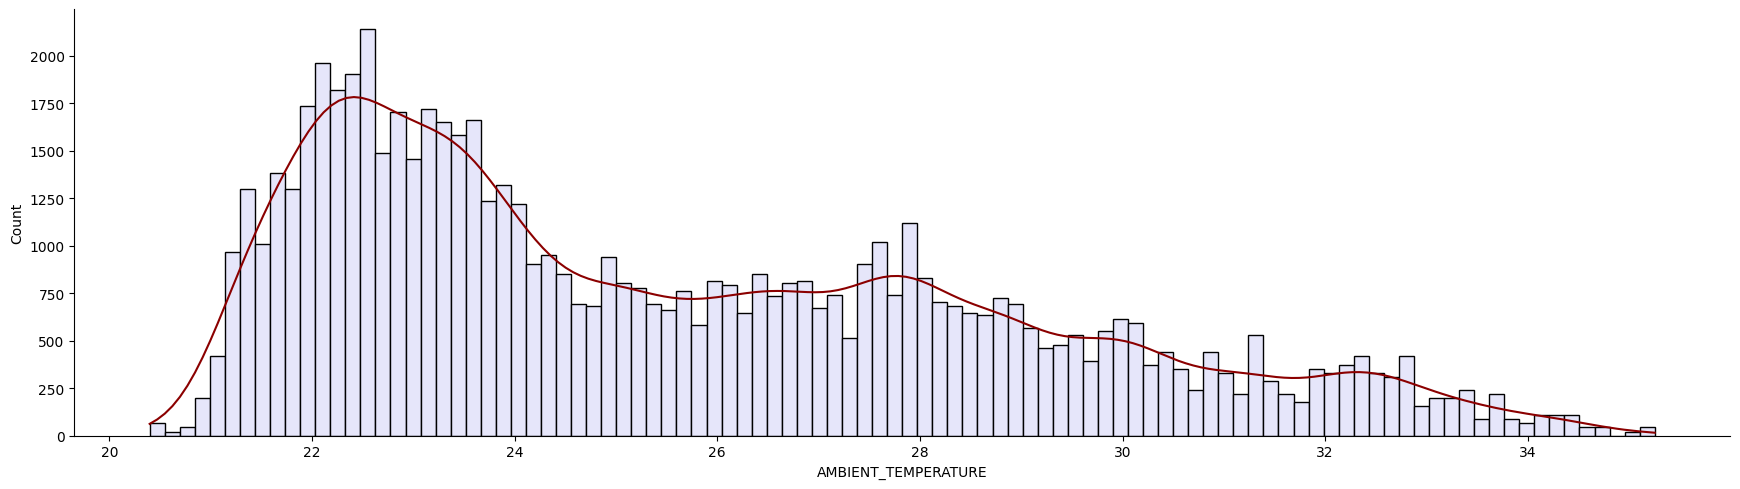

In [25]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "darkred", facecolor = "lavender",height = 5, aspect = 3.5);

# **Solar power generation in how many days**

In [26]:
df_solar['DATE'].nunique()

34

# **Multiple Plotting of DC_POWER generation on per day basis.**

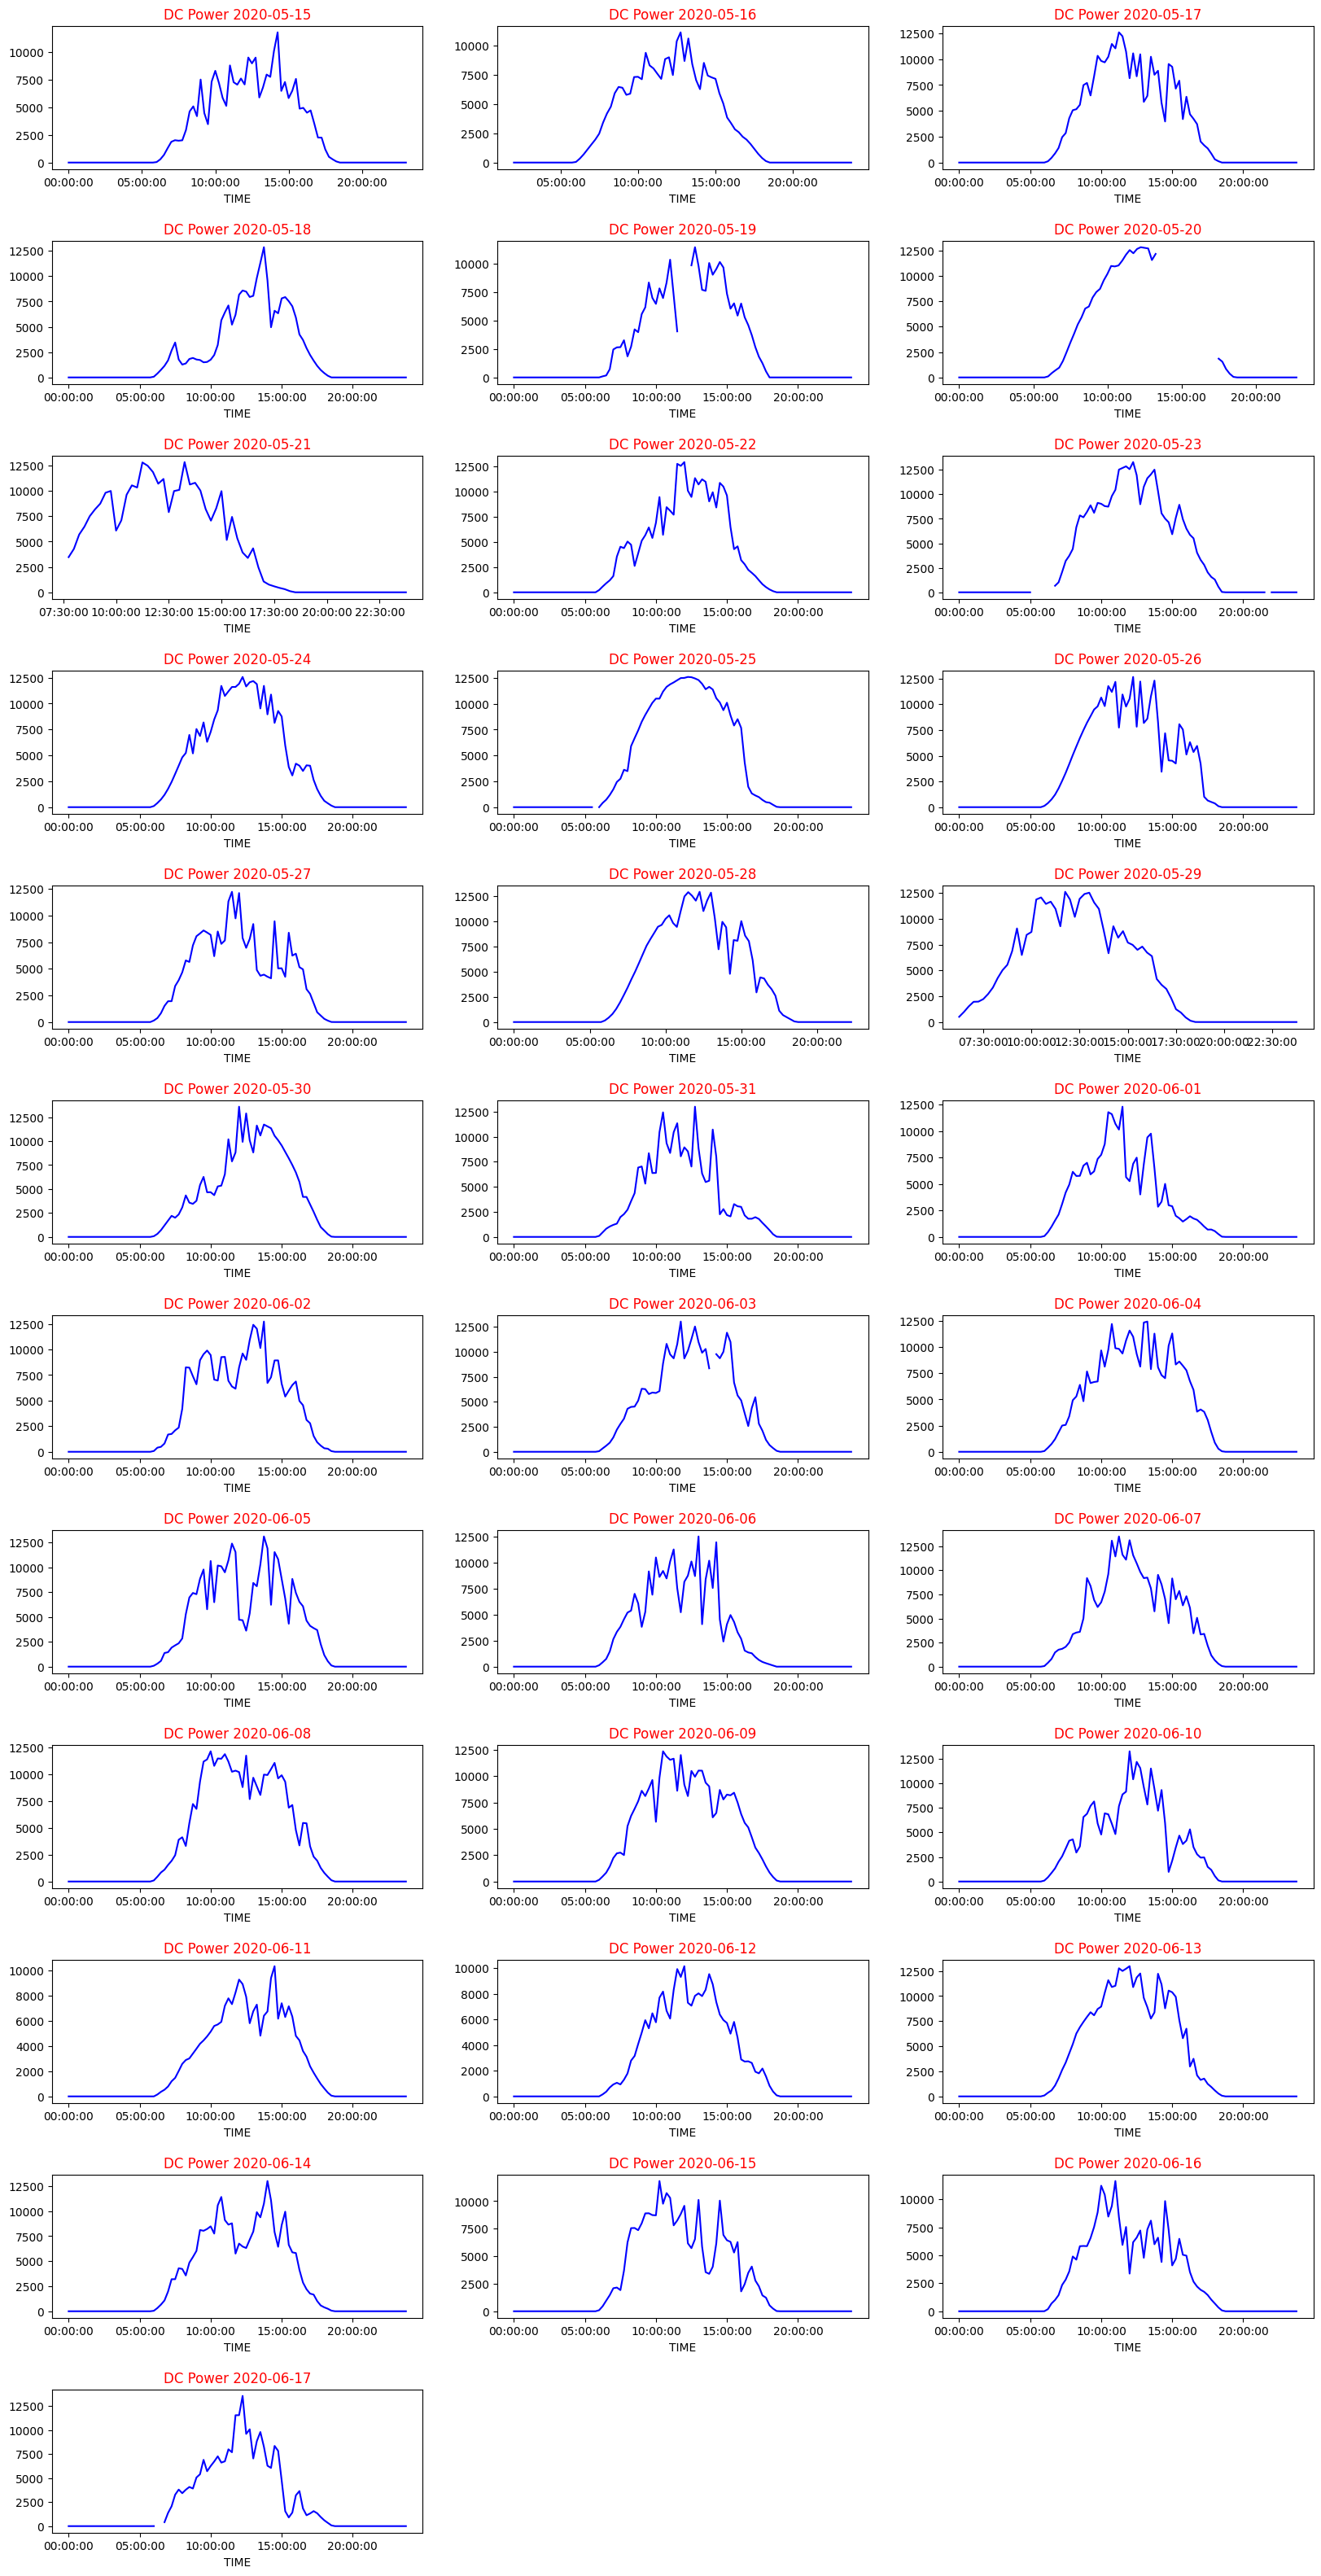

In [27]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='red')

Daywise_plot(data=solar_dc, row=12, col=3)

# **The average power generation per day**

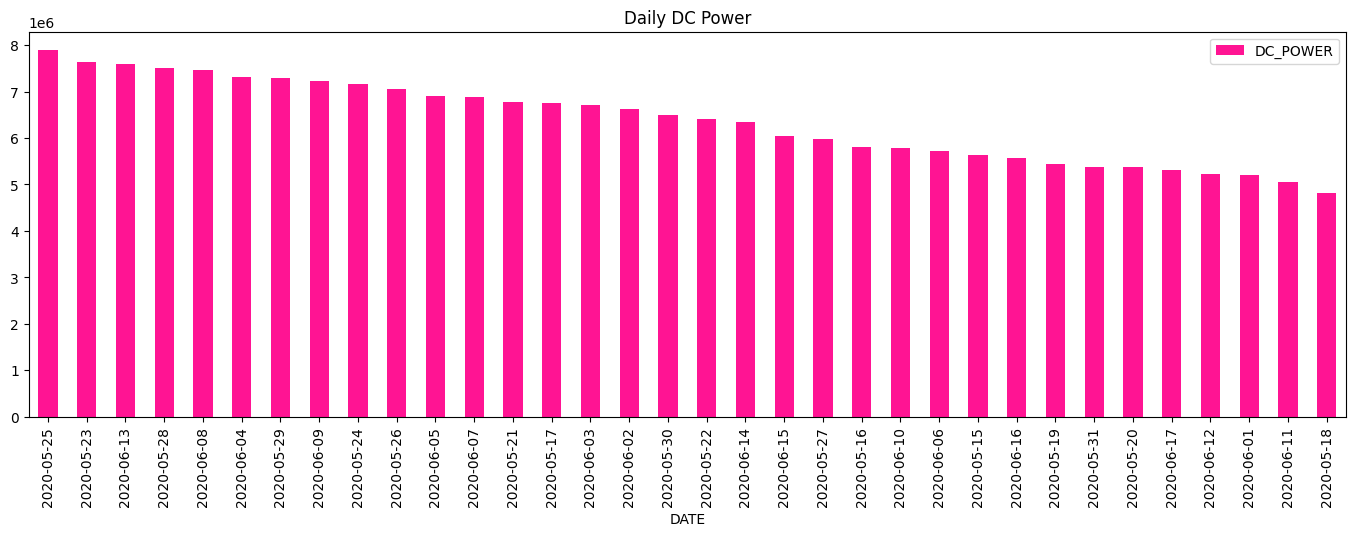

In [28]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='deeppink')
plt.title('Daily DC Power')
plt.show()

# **Multiple Plotting of IRRADIATION generation on per day basis.**

****

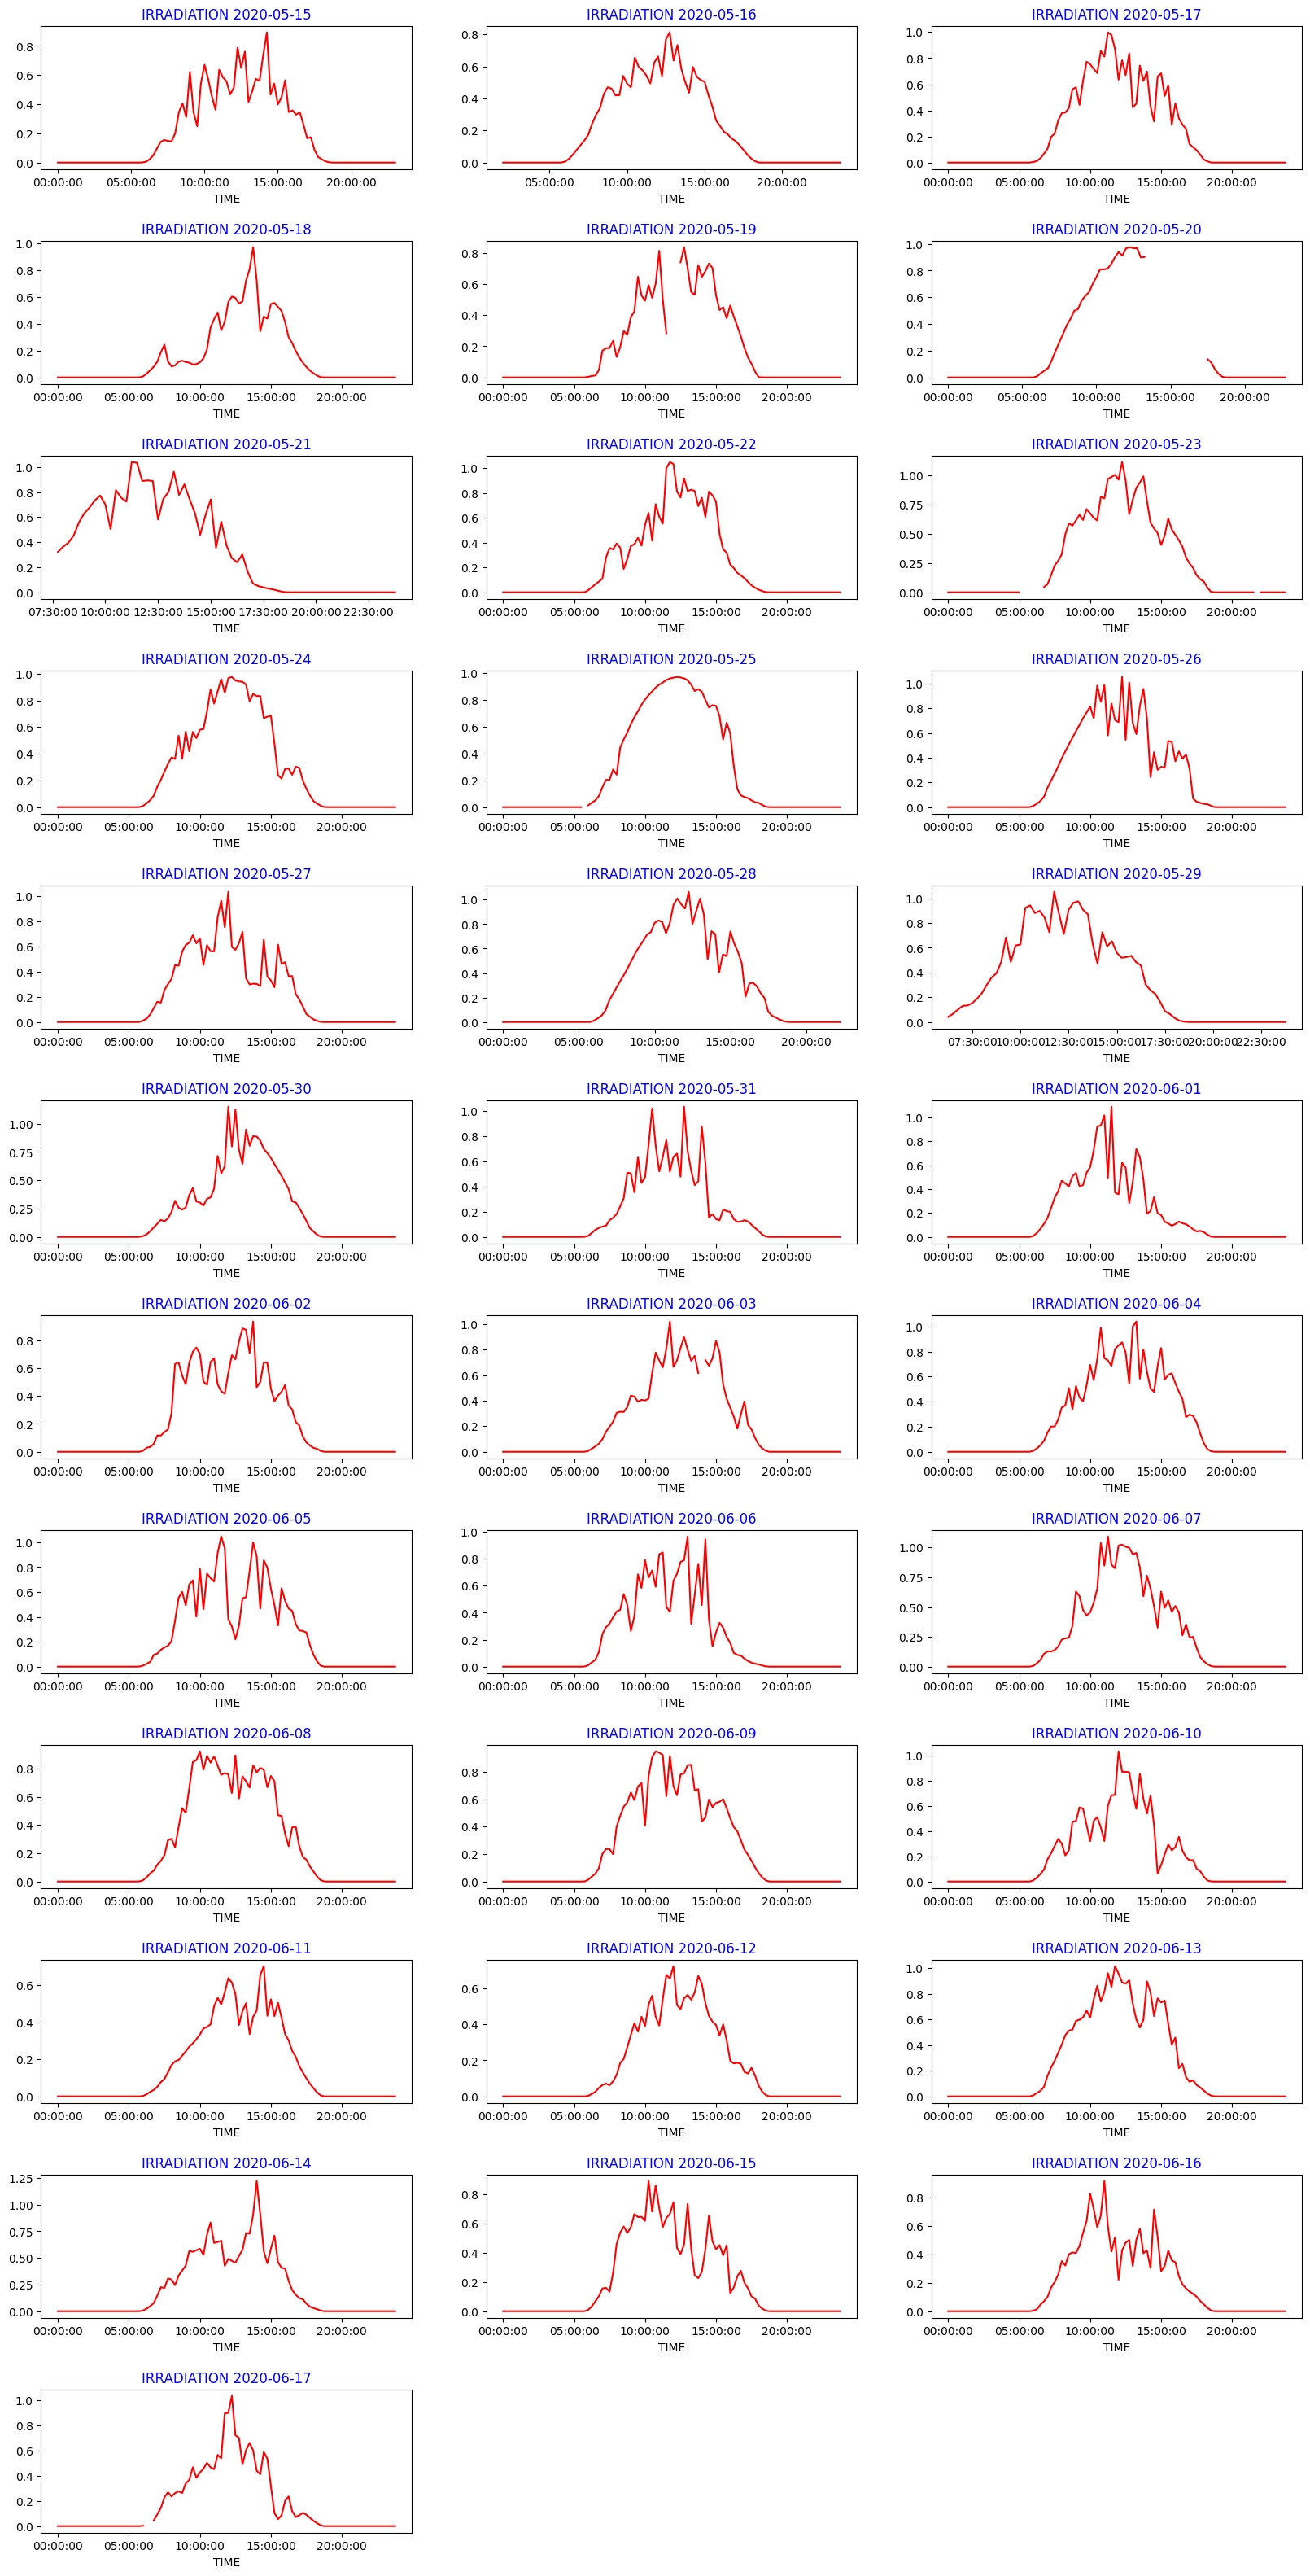

In [29]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_irradiation, row=12, col=3)

# **The average Irradiation per day.**

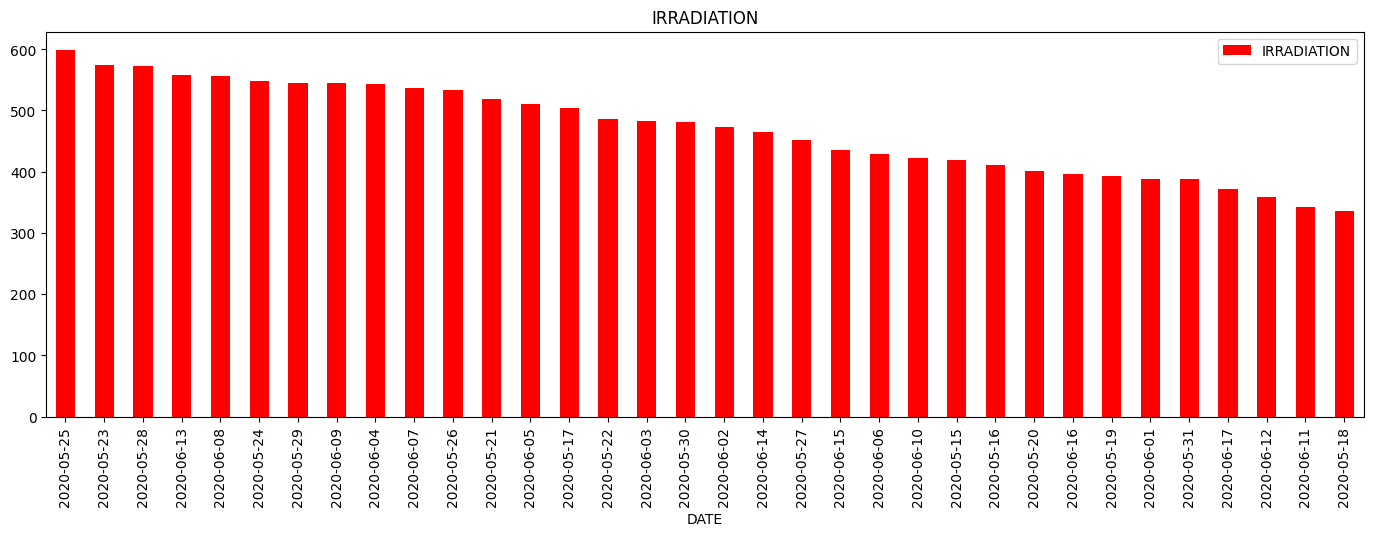

In [30]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('IRRADIATION')
plt.show()

# **Multiple Plotting of ambient temperature :on per day basis.**

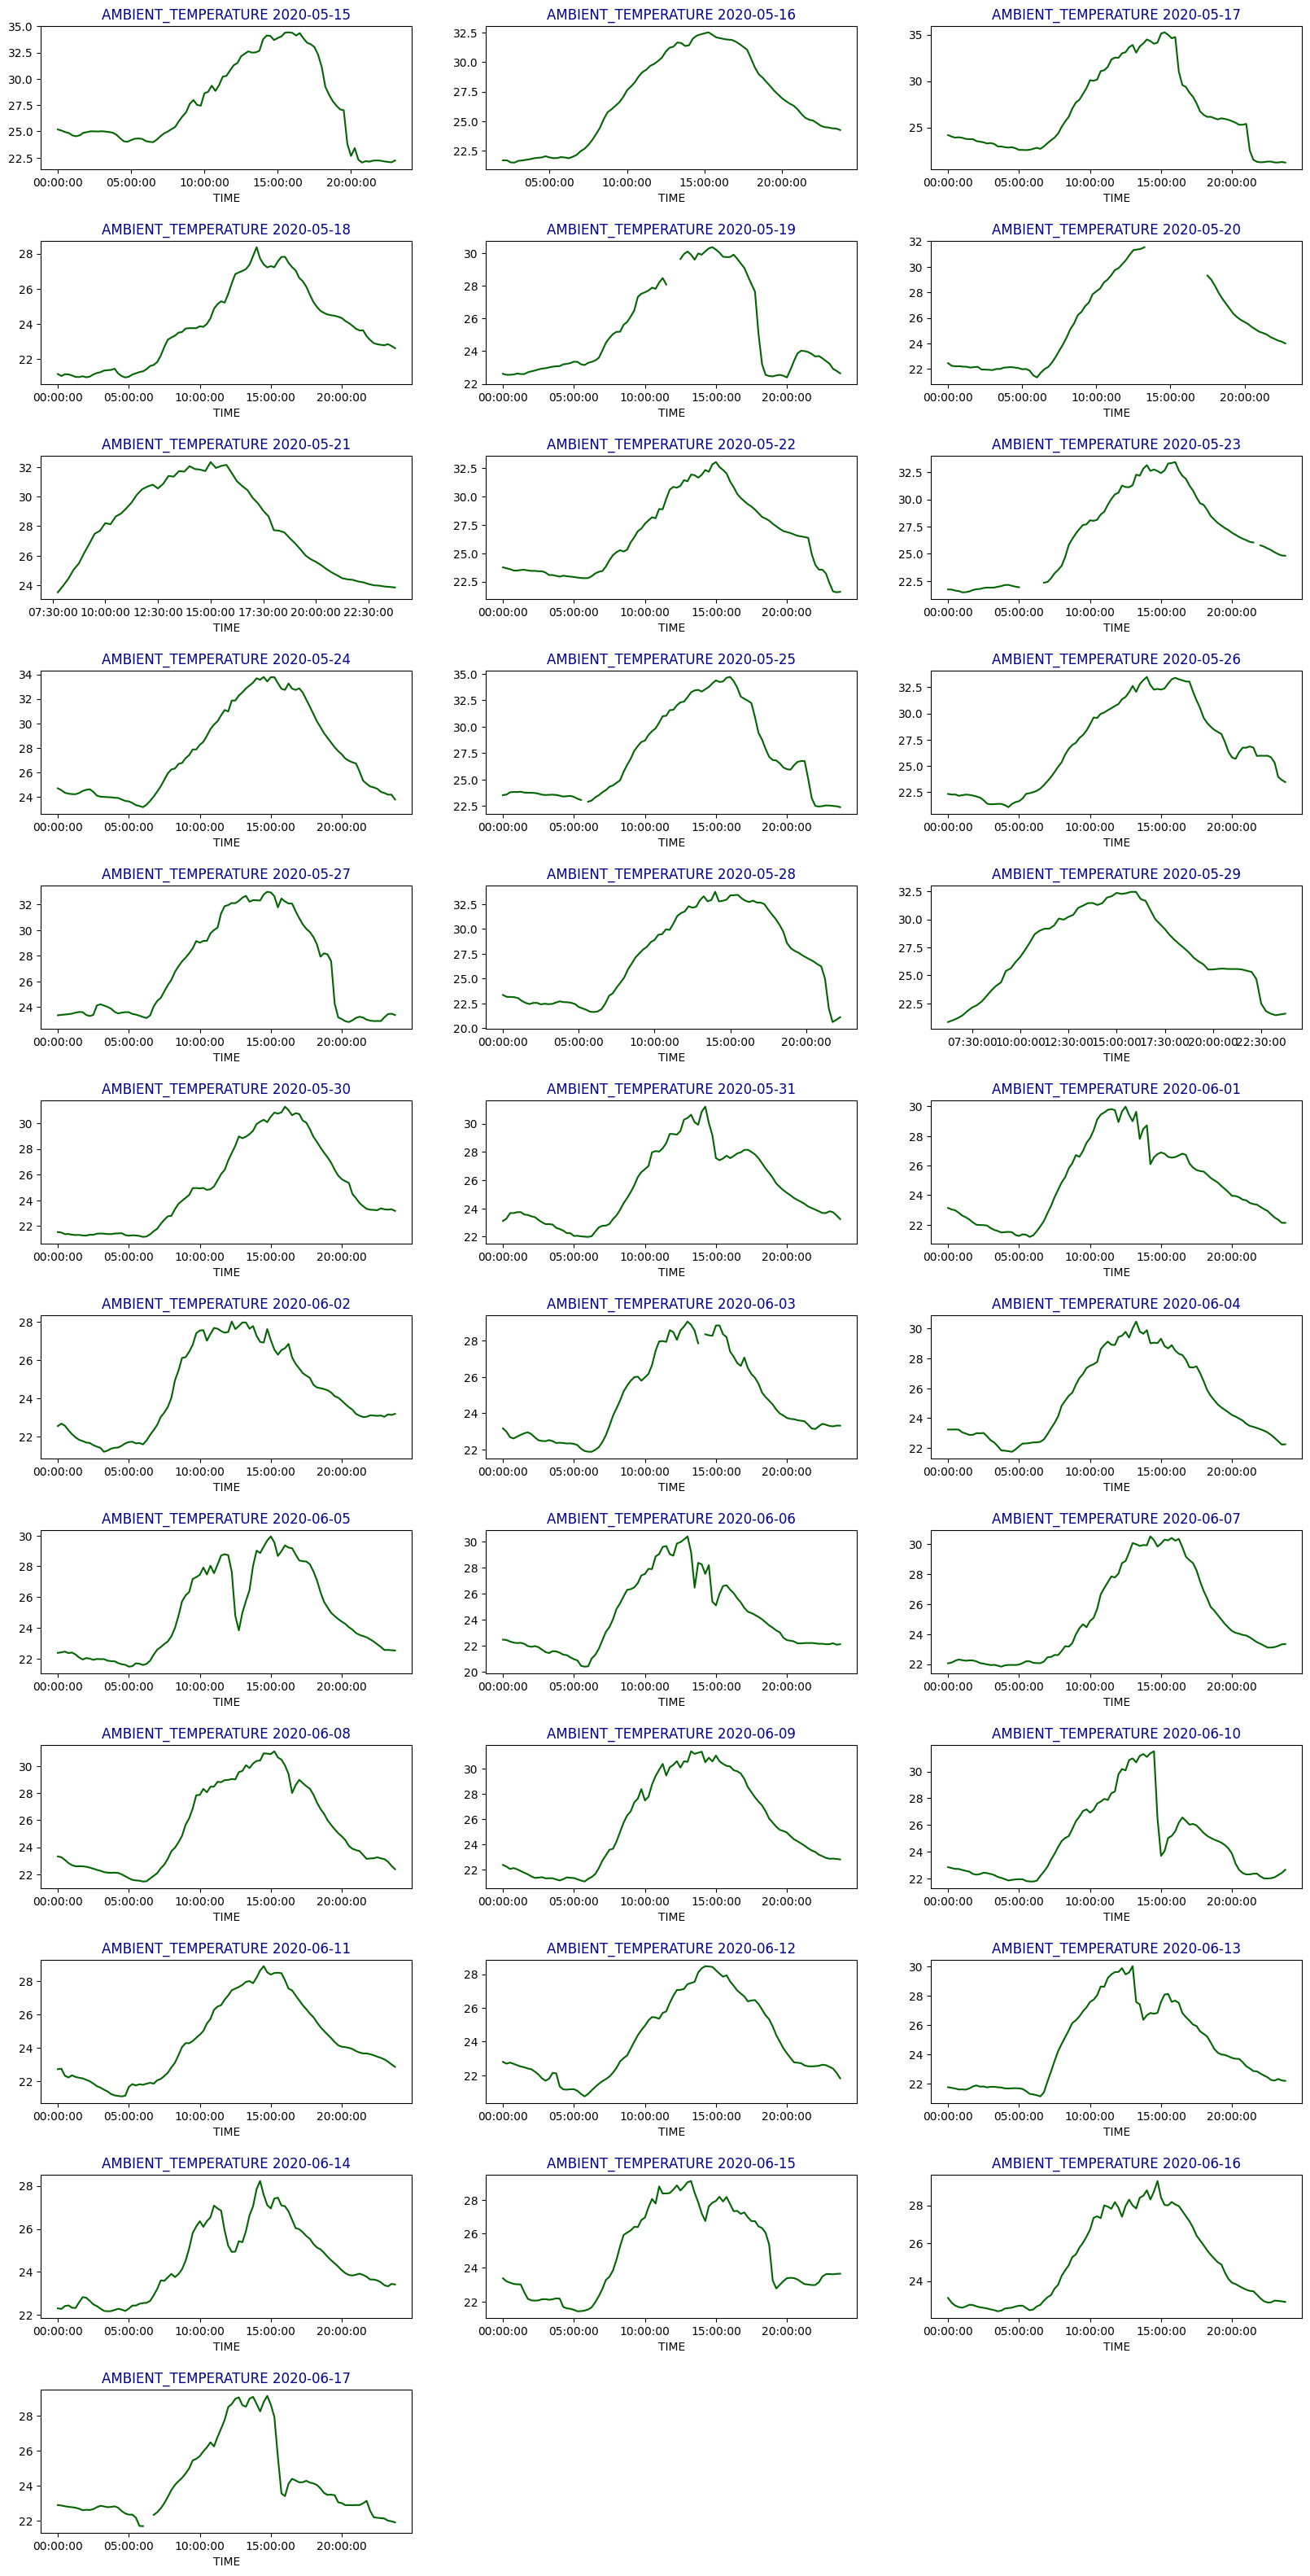

In [31]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='darkblue')

Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

# **The average AMBIENT TEMPERATURE per day**

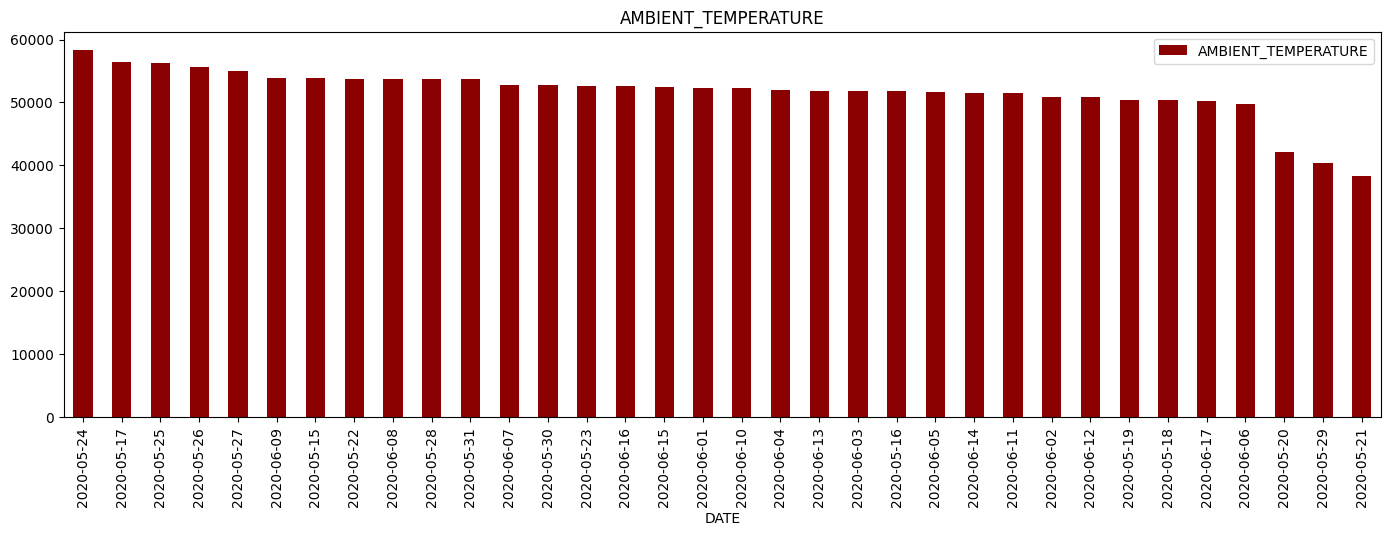

In [32]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkred')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

# **Comparision between Best and Worst Power generation**
Highest average DC_POWER is generated on "2020-05-25"

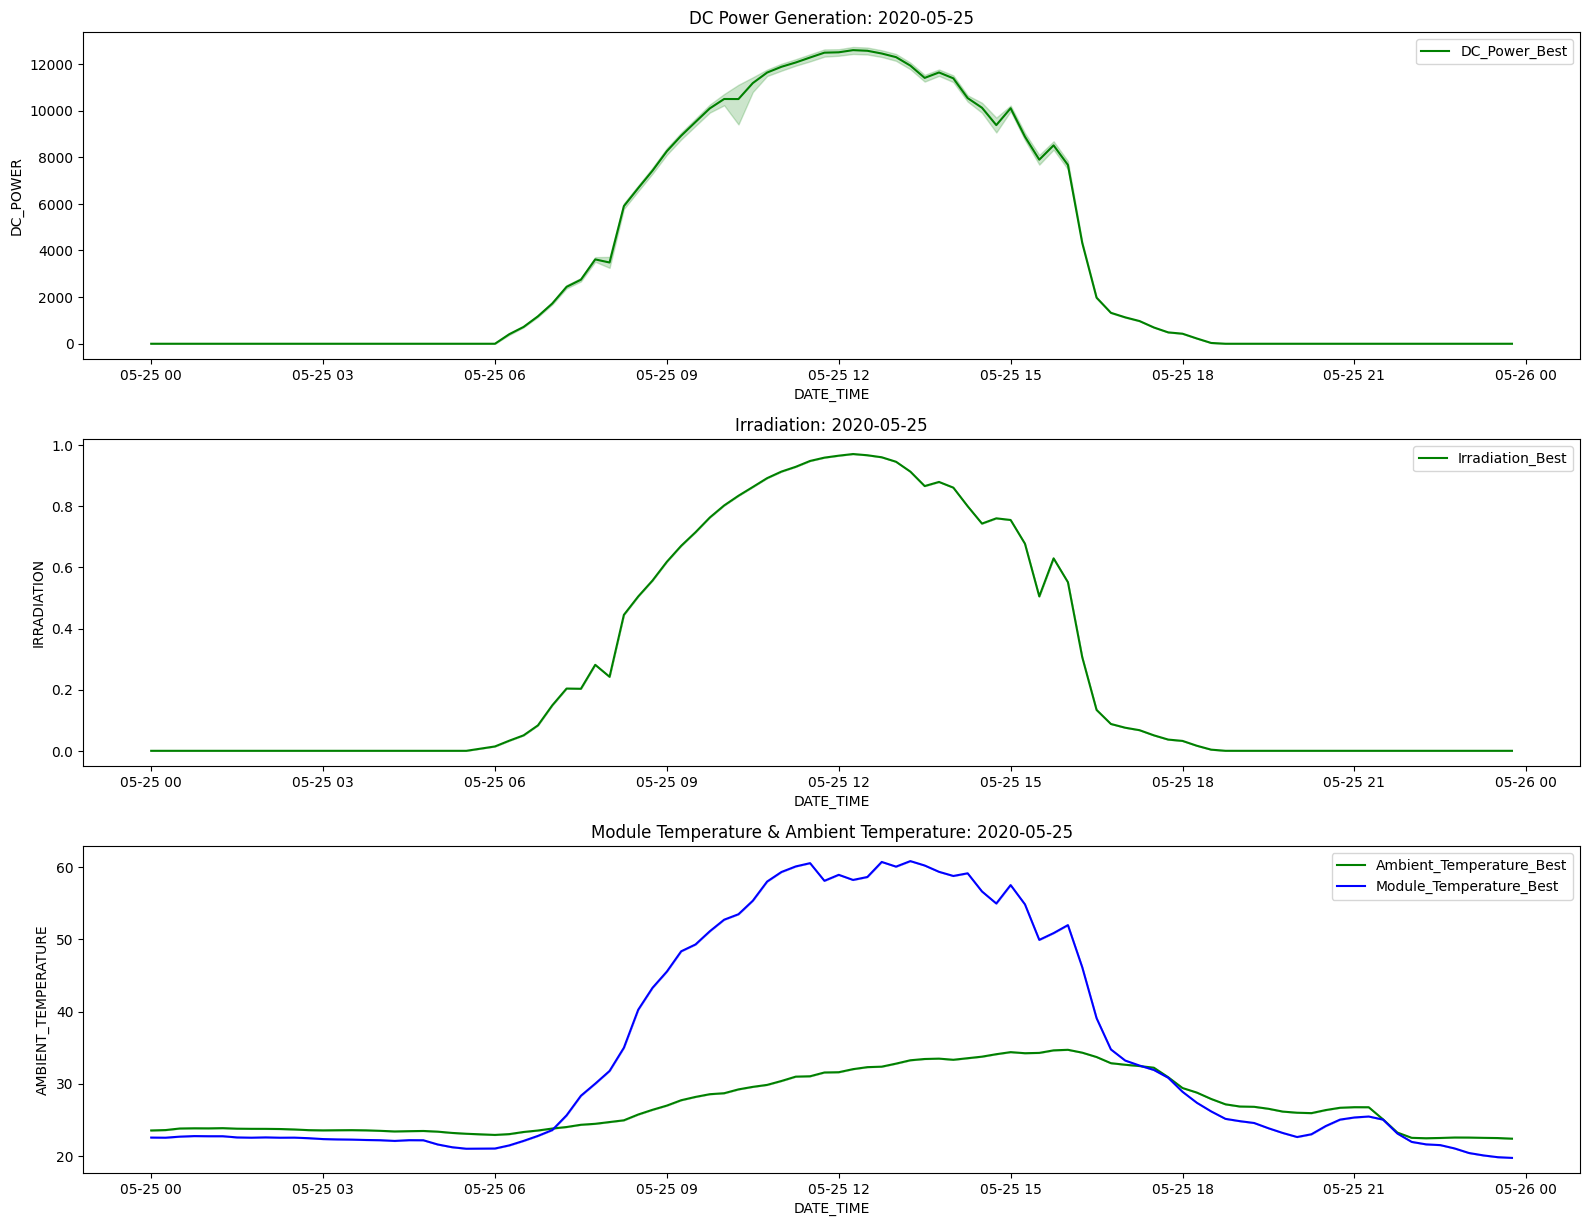

In [33]:
plt.figure(figsize=(16, 16))

date = ["2020-05-25"]

# DC Power plot
plt.subplot(411)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)]["DATE_TIME"],
    y=df_solar[df_solar["DATE_STRING"].isin(date)]["DC_POWER"],
    label="DC_Power_Best",
    color="green"
)
plt.title("DC Power Generation: {}".format(date[0]))

# Irradiation plot
plt.subplot(412)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)]["DATE_TIME"],
    y=df_solar[df_solar["DATE_STRING"].isin(date)]["IRRADIATION"],
    label="Irradiation_Best",
    color="green"
)
plt.title("Irradiation: {}".format(date[0]))

# Ambient Temperature and Module Temperature plot
plt.subplot(413)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)]["DATE_TIME"],
    y=df_solar[df_solar["DATE_STRING"].isin(date)]["AMBIENT_TEMPERATURE"],
    label="Ambient_Temperature_Best",
    color="green"
)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)]["DATE_TIME"],
    y=df_solar[df_solar["DATE_STRING"].isin(date)]["MODULE_TEMPERATURE"],
    label="Module_Temperature_Best",
    color="blue"
)
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()

Lowest average DC_POWER is generated on "2020-06-18"

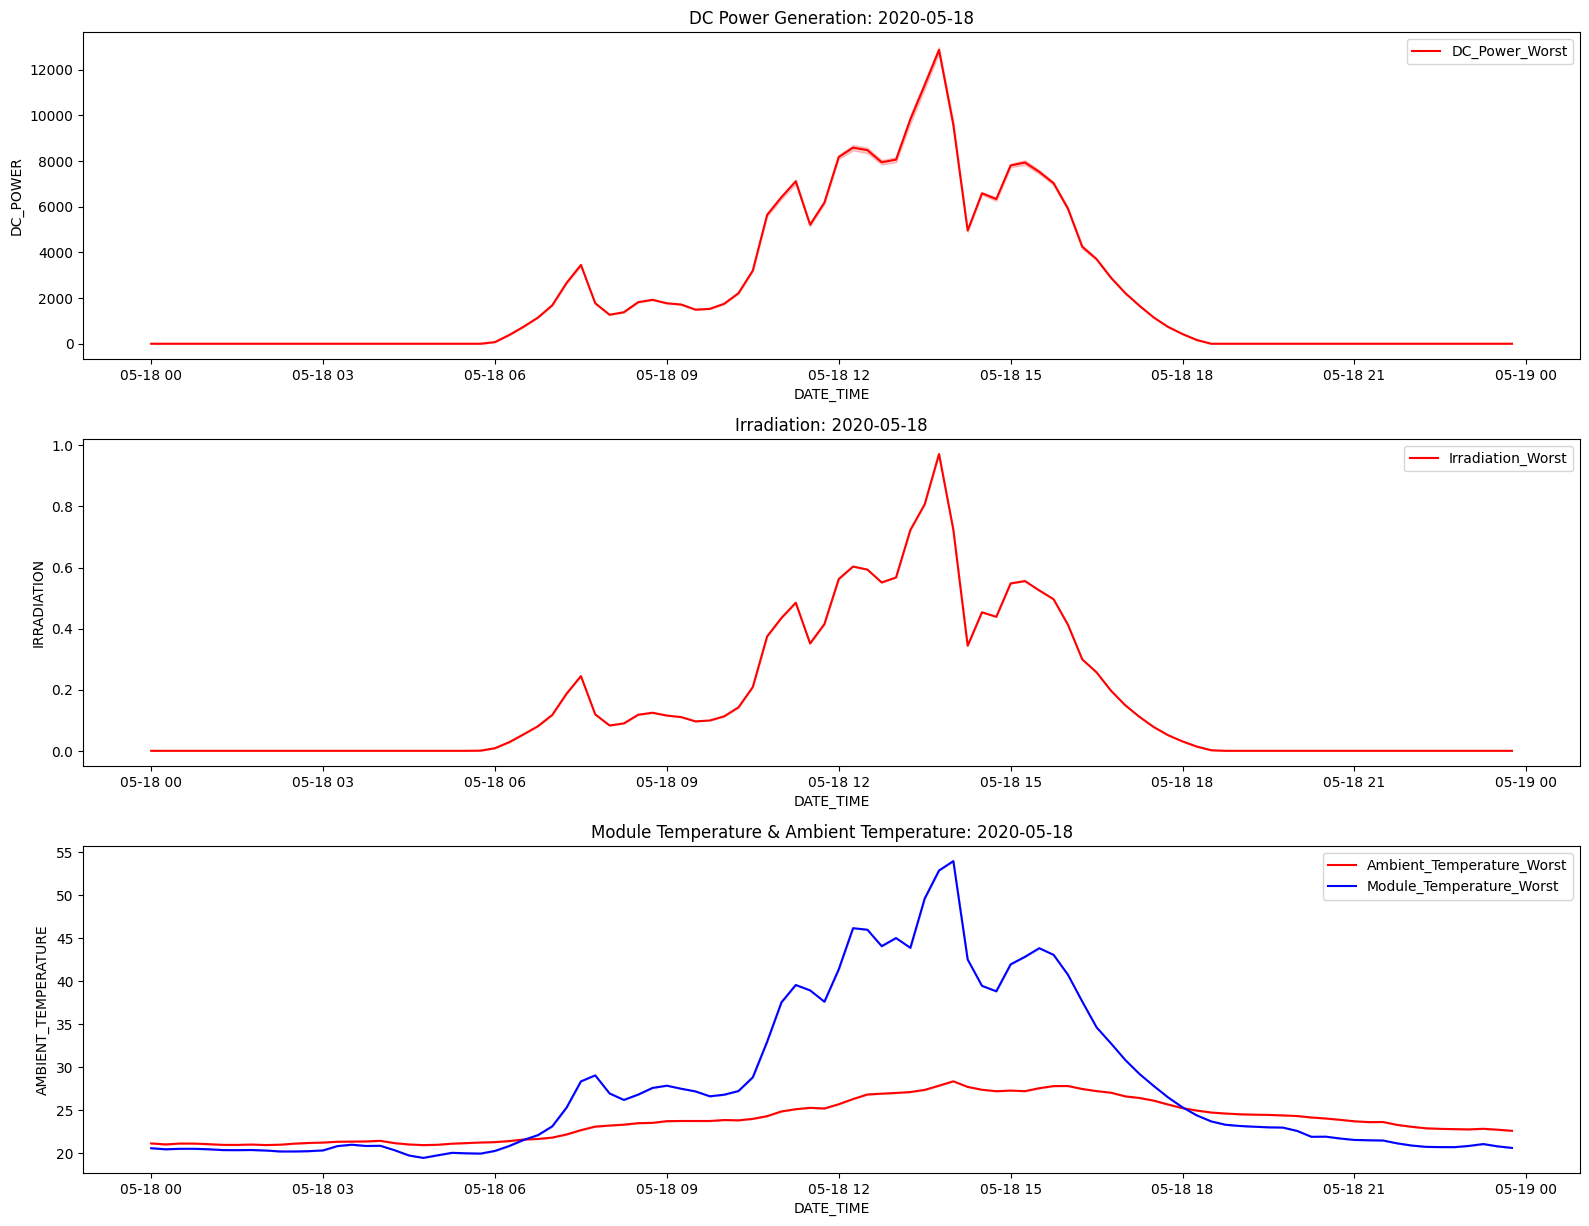

In [34]:
date = ["2020-05-18"]
plt.figure(figsize=(16, 16))

# DC Power plot
plt.subplot(411)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)]["DATE_TIME"],
    y=df_solar[df_solar["DATE_STRING"].isin(date)]["DC_POWER"],
    label="DC_Power_Worst",
    color="red"
)
plt.title("DC Power Generation: {}".format(date[0]))

# Irradiation plot
plt.subplot(412)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)]["DATE_TIME"],
    y=df_solar[df_solar["DATE_STRING"].isin(date)]["IRRADIATION"],
    label="Irradiation_Worst",
    color="red"
)
plt.title("Irradiation: {}".format(date[0]))

# Ambient Temperature and Module Temperature plot
plt.subplot(413)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)]["DATE_TIME"],
    y=df_solar[df_solar["DATE_STRING"].isin(date)]["AMBIENT_TEMPERATURE"],
    label="Ambient_Temperature_Worst",
    color="red"
)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)]["DATE_TIME"],
    y=df_solar[df_solar["DATE_STRING"].isin(date)]["MODULE_TEMPERATURE"],
    label="Module_Temperature_Worst",
    color="blue"
)
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()

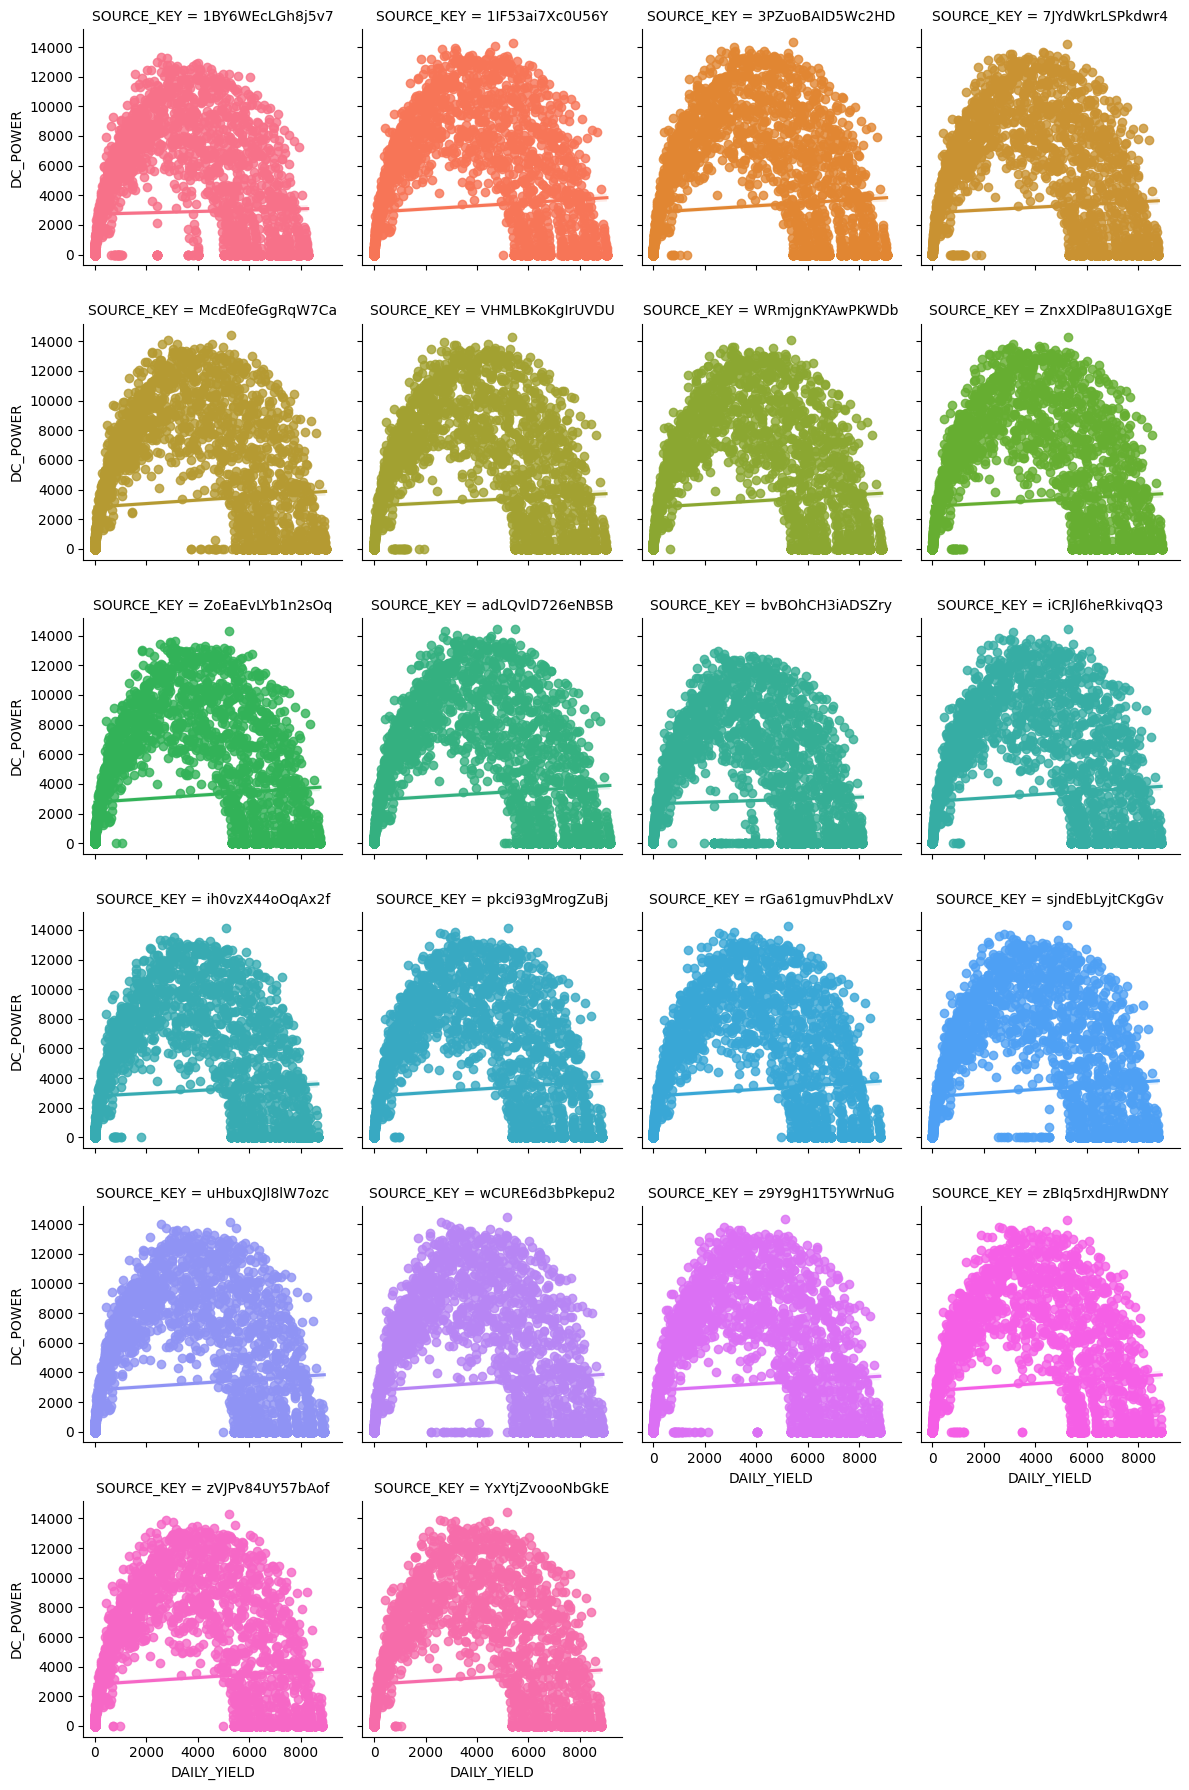

In [35]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar,fit_reg=True);

# **Solar Power Plant Inverter Efficiency Calculation**
# MAXIMUM DC_POWER IN SOLAR

In [36]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values
solar_dc_power.max()

14471.125

# **MAXIMUM AC_POWER IN SOLAR**

In [37]:
solar_ac_power.max()

1410.95

# **Power conversion Efficiency ratio AC/DC of Solar Power Plant**

In [38]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power conversion Efficiency ratio AC/DC of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power conversion Efficiency ratio AC/DC of Solar Power Plant:  9.750 %


In [39]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

36823

In [40]:
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

36823

## **PLOT POWER vs EFFICIENCY**

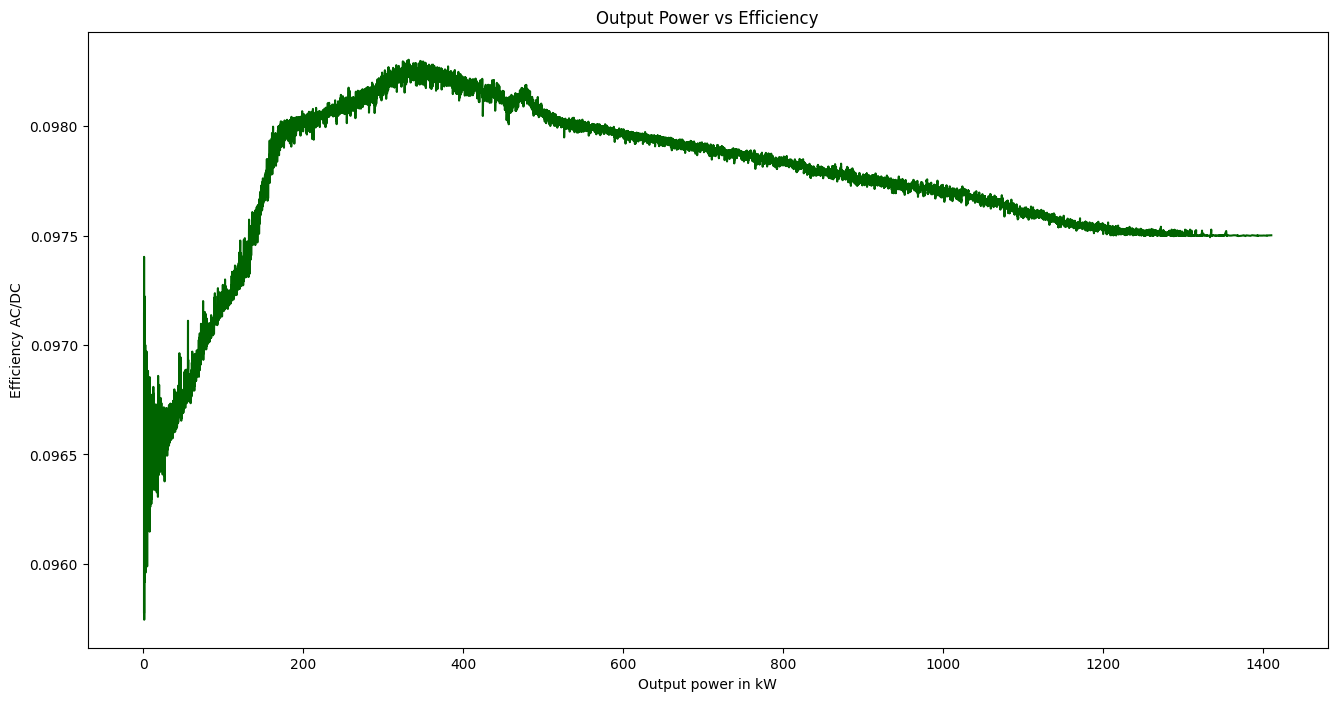

In [41]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='darkgreen')
plt.xlabel('Output power in kW')
plt.ylabel('Efficiency AC/DC')
plt.title('Output Power vs Efficiency');

# **# Solar Power Prediction using different ML techniques**

In [42]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

# **1. LinearRegression**

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9995%


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train, y_train, X_test, y_test are defined

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Calculate R2 Score
R2_Score_lr = round(r2_score(y_test, y_pred_lr) * 100, 2)

# Mean Absolute Error and Mean Squared Error
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)

print("R2 Score: ", R2_Score_lr, "%")
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)

# If this were a classification problem, you’d compute these metrics like so:
# (Commenting out since these don't apply directly to regression without a classification step)
# accuracy = accuracy_score(y_test, y_pred_lr)
# precision = precision_score(y_test, y_pred_lr, average='binary')  # or 'micro', 'macro', 'weighted'
# recall = recall_score(y_test, y_pred_lr, average='binary')
# f1 = f1_score(y_test, y_pred_lr, average='binary')

# Print statements for classification metrics
# print("Accuracy: ", accuracy)
# print("Precision: ", precision)
# print("Recall: ", recall)
# print("F1 Score: ", f1)

# Error rate for regression (just a conceptual approach)
error_rate = 1 - (R2_Score_lr / 100)
print("Error Rate: ", error_rate)


R2 Score:  100.0 %
Mean Absolute Error (MAE):  0.6384692029555021
Mean Squared Error (MSE):  0.8476234157706481
Error Rate:  0.0


# **2. Random Forest Regressor**

In [47]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = lr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Assuming X_train, y_train, X_test, y_test are already defined
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

# Calculate R2 score using r2_score function
R2_Score_rfr = round(r2_score(y_test, y_pred_rfr) * 100, 2)
print("R2 Score (calculated):", R2_Score_rfr, "%")

# Get the model score using the score method
model_score = round(rfr.score(X_test, y_test) * 100, 2)
print("Model Score (using score method):", model_score, "%")

R2 Score (calculated): 100.0 %
Model Score (using score method): 100.0 %


In [49]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

# R² Score, MAE, MSE, RMSE for RandomForestRegressor
R2_Score_rfr = round(r2_score(y_test, y_pred_rfr) * 100, 2)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)

print("Random Forest Regressor")
print("R2 Score: ", R2_Score_rfr, "%")
print("Mean Absolute Error (MAE): ", mae_rfr)
print("Mean Squared Error (MSE): ", mse_rfr)
print("Root Mean Squared Error (RMSE): ", rmse_rfr)
print("\n")

Random Forest Regressor
R2 Score:  100.0 %
Mean Absolute Error (MAE):  0.12092758542439397
Mean Squared Error (MSE):  0.14325437812889466
Root Mean Squared Error (RMSE):  0.3784896010842235




# **3. Decision Tree Regressor**

In [50]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Assuming X_train, y_train, X_test, y_test are already defined
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

# Calculate R2 score using r2_score function
R2_Score_dtr = round(r2_score(y_test, y_pred_dtr) * 100, 2)
print("R2 Score (calculated):", R2_Score_dtr, "%")

# Get the model score using the score method
model_score_dtr = round(dtr.score(X_test, y_test) * 100, 2)
print("Model Score (using score method):", model_score_dtr, "%")

R2 Score (calculated): 100.0 %
Model Score (using score method): 100.0 %


In [52]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

# R² Score, MAE, MSE, RMSE for DecisionTreeRegressor
R2_Score_dtr = round(r2_score(y_test, y_pred_dtr) * 100, 2)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)

print("Decision Tree Regressor")
print("R2 Score: ", R2_Score_dtr, "%")
print("Mean Absolute Error (MAE): ", mae_dtr)
print("Mean Squared Error (MSE): ", mse_dtr)
print("Root Mean Squared Error (RMSE): ", rmse_dtr)

Decision Tree Regressor
R2 Score:  100.0 %
Mean Absolute Error (MAE):  0.15237612421163219
Mean Squared Error (MSE):  0.17511968484908946
Root Mean Squared Error (RMSE):  0.41847303957255055


# **12. Result Prediction**

In [53]:
forecast_prediction = rfr.predict(X_test)
print(forecast_prediction)

[   0.         1071.33741077  299.66801785 ...  669.37389285  377.83764286
  117.4915    ]


In [54]:
cross_check = pd.DataFrame({'Actual' : y_test , 'Predicted' : forecast_prediction})
cross_check.head()

,Actual,Predicted
43819,0.0000,0.000000
2949,1072.3250,1071.337411
33769,299.8125,299.668018
47825,0.0000,0.000000
29370,0.0000,0.000000


In [55]:
cross_check.sample(5)

,Actual,Predicted
47330,0.000000,0.000000
32373,318.837500,318.776964
26038,115.114286,115.181554
138,0.000000,0.000000
22279,1160.100000,1160.515661


<Axes: >

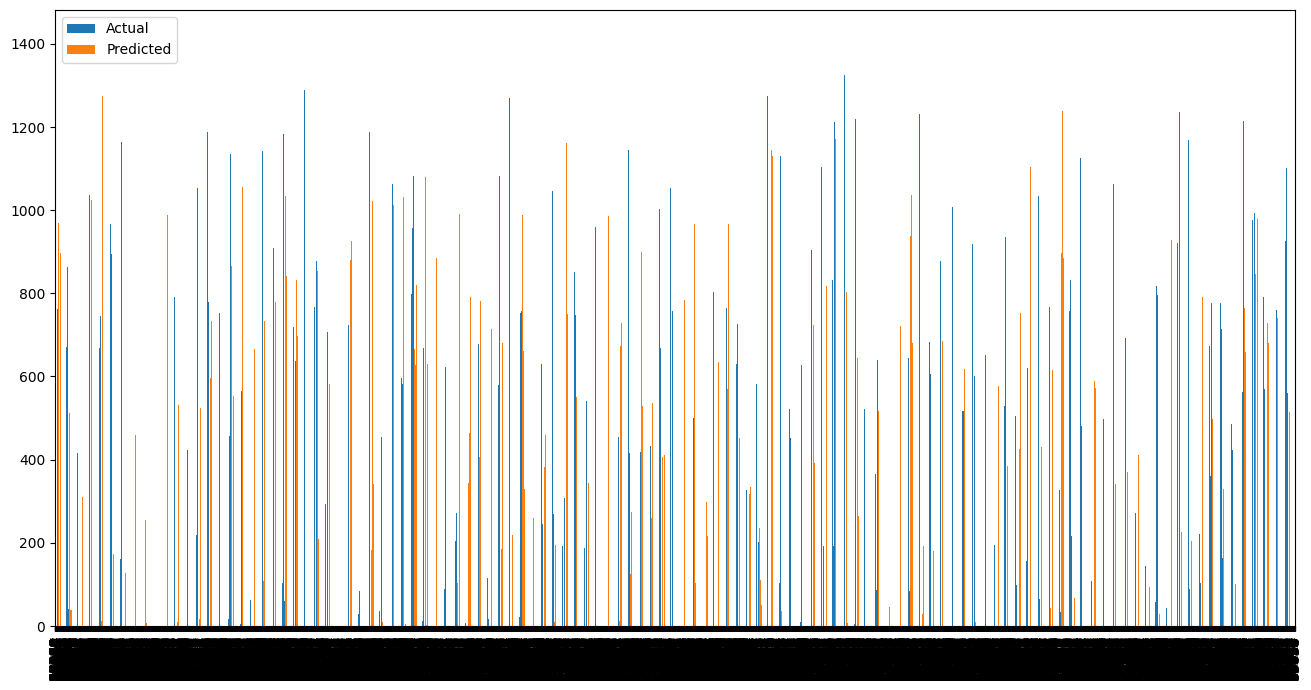

In [56]:
cross_check.plot(kind='bar',figsize=(16,8))

In [57]:
cross_check['Error'] = cross_check['Actual'] - cross_check['Predicted']
cross_check.head()

,Actual,Predicted,Error
43819,0.0000,0.000000,0.000000
2949,1072.3250,1071.337411,0.987589
33769,299.8125,299.668018,0.144482
47825,0.0000,0.000000,0.000000
29370,0.0000,0.000000,0.000000


In [58]:
cross_check_final  = cross_check[cross_check['Error'] <= 20]
cross_check_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Times',
            'color': 'LigntGreen',
            'font-size': '13px'
        })

,Actual,Predicted,Error
66152,142.114286,142.111143,0.003143
19251,0.000000,0.000000,0.000000
54627,35.442857,35.434393,0.008464
40075,257.357143,257.327911,0.029232
16633,119.128571,119.304071,-0.175500
21476,0.000000,0.000000,0.000000
2299,0.000000,0.000000,0.000000
18826,0.000000,0.000000,0.000000
13979,636.200000,636.094482,0.105518
20449,1042.885714,1042.186429,0.699285


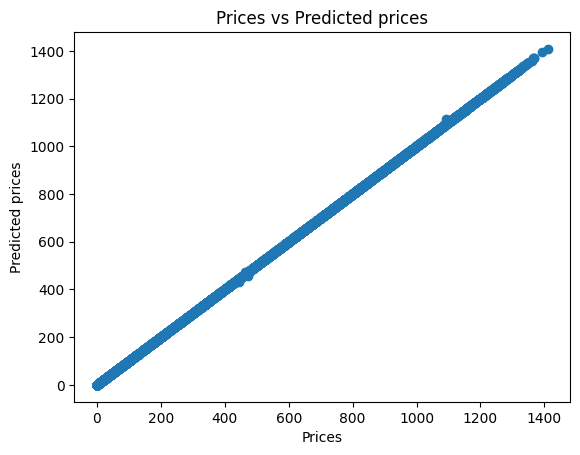

In [59]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test,forecast_prediction)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

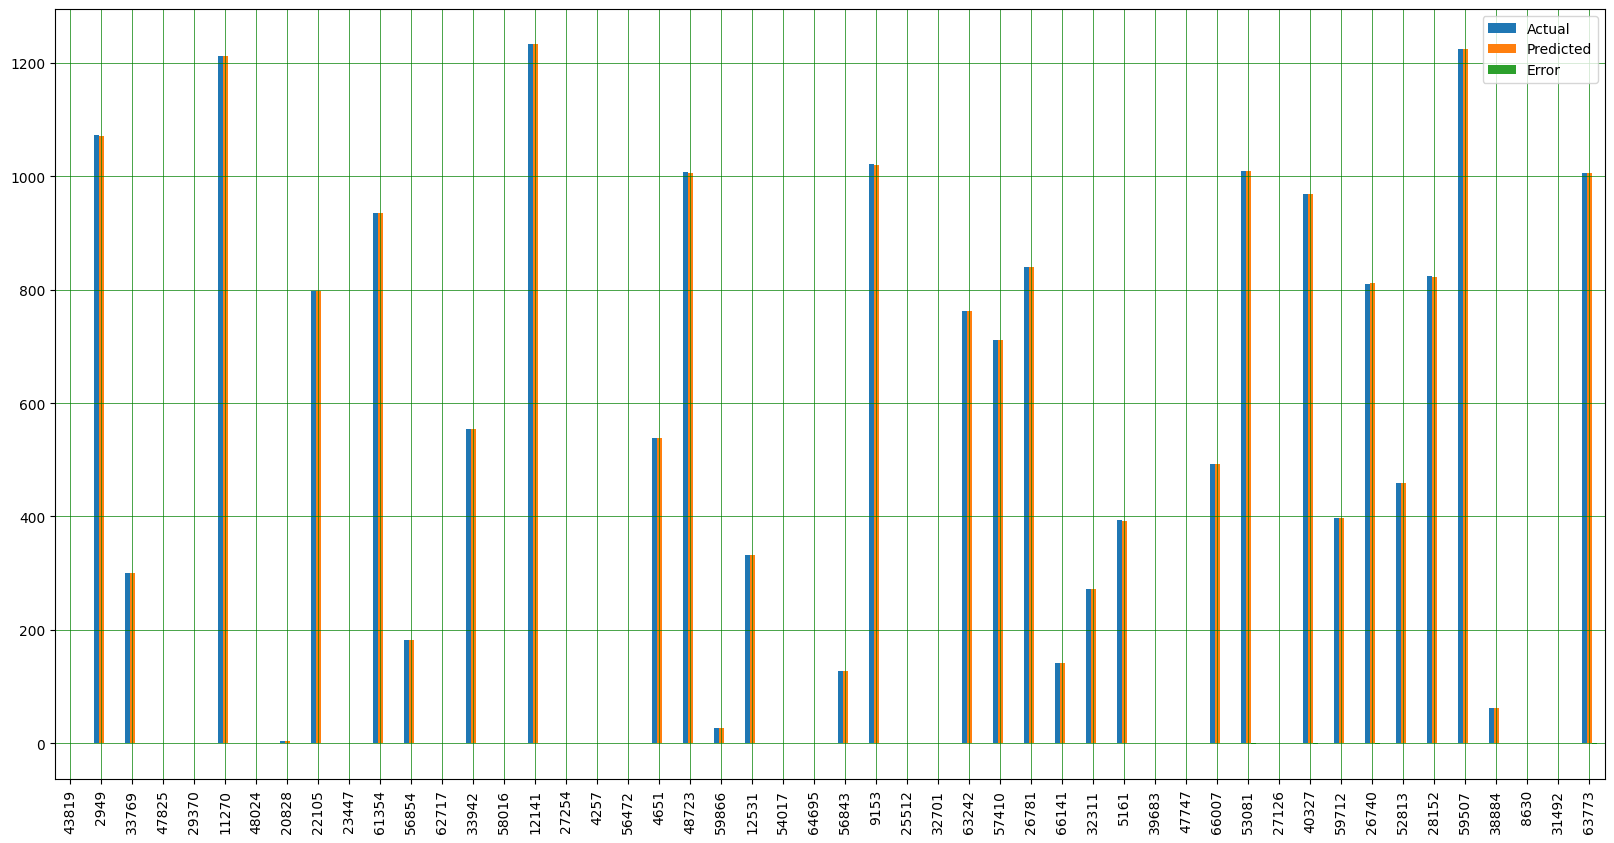

In [60]:
df3 = cross_check.head(50)
df3.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5',color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5',color='black')
plt.show()